In [51]:
import sys
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import  VotingClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from custom_ensemble import CustomEnsemble 
import pickle

In [52]:
df=pd.read_csv('voice.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000) 
encoder=LabelEncoder()
gen=encoder.fit_transform(df['label'])
df['label']=gen 
df 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [53]:
encoder.classes_

array(['female', 'male'], dtype=object)

In [54]:
df=df.sample(df.shape[0],random_state=72)
df 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1736,0.143916,0.086153,0.154149,0.057340,0.214468,0.157128,1.135276,4.445334,0.972161,0.787590,0.212420,0.143916,0.148854,0.015889,0.275862,0.485085,0.007812,6.031250,6.023438,0.130180,0
688,0.153817,0.058905,0.162708,0.102083,0.202292,0.100208,3.651088,19.951360,0.896026,0.445363,0.099583,0.153817,0.105999,0.089286,0.263158,0.520601,0.092773,0.800781,0.708008,0.670115,1
719,0.159023,0.065191,0.175968,0.094592,0.196359,0.101767,3.229614,15.630528,0.896248,0.406344,0.092704,0.159023,0.093707,0.020877,0.185185,0.414632,0.004883,0.776367,0.771484,0.582566,1
252,0.126626,0.088278,0.128532,0.049552,0.204482,0.154930,28.274954,853.298248,0.847263,0.535170,0.000000,0.126626,0.089230,0.016293,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
937,0.201306,0.061697,0.232042,0.132249,0.257232,0.124983,2.110824,7.107624,0.874539,0.294794,0.258685,0.201306,0.113616,0.046921,0.269663,0.962573,0.140625,5.929688,5.789062,0.093623,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0.209199,0.041990,0.209870,0.191169,0.234286,0.043117,2.046064,6.907791,0.862945,0.303689,0.205195,0.209199,0.162562,0.049332,0.277457,1.301398,0.023438,6.843750,6.820312,0.138439,0
3146,0.124695,0.080989,0.131882,0.042033,0.197268,0.155234,1.970756,8.000504,0.958531,0.721682,0.197712,0.124695,0.182513,0.068966,0.238806,0.293527,0.007812,0.851562,0.843750,0.396091,0
1070,0.181421,0.055640,0.170887,0.145485,0.226309,0.080825,1.211773,4.257557,0.928712,0.427925,0.160495,0.181421,0.130937,0.047105,0.277457,1.071340,0.023438,6.445312,6.421875,0.138094,1
1811,0.192817,0.035026,0.191238,0.172787,0.219163,0.046376,2.052242,7.308963,0.866241,0.236268,0.173037,0.192817,0.169441,0.024653,0.231884,0.550521,0.156250,4.796875,4.640625,0.125740,0


In [55]:
df_train=df.head(2000)
df_train 

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1736,0.143916,0.086153,0.154149,0.057340,0.214468,0.157128,1.135276,4.445334,0.972161,0.787590,0.212420,0.143916,0.148854,0.015889,0.275862,0.485085,0.007812,6.031250,6.023438,0.130180,0
688,0.153817,0.058905,0.162708,0.102083,0.202292,0.100208,3.651088,19.951360,0.896026,0.445363,0.099583,0.153817,0.105999,0.089286,0.263158,0.520601,0.092773,0.800781,0.708008,0.670115,1
719,0.159023,0.065191,0.175968,0.094592,0.196359,0.101767,3.229614,15.630528,0.896248,0.406344,0.092704,0.159023,0.093707,0.020877,0.185185,0.414632,0.004883,0.776367,0.771484,0.582566,1
252,0.126626,0.088278,0.128532,0.049552,0.204482,0.154930,28.274954,853.298248,0.847263,0.535170,0.000000,0.126626,0.089230,0.016293,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
937,0.201306,0.061697,0.232042,0.132249,0.257232,0.124983,2.110824,7.107624,0.874539,0.294794,0.258685,0.201306,0.113616,0.046921,0.269663,0.962573,0.140625,5.929688,5.789062,0.093623,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.199321,0.052499,0.184211,0.152323,0.258149,0.105826,2.311426,8.848103,0.882884,0.089740,0.275299,0.199321,0.134527,0.015764,0.205128,1.173437,0.007812,5.343750,5.335938,0.156099,1
1049,0.192763,0.059136,0.216300,0.126000,0.240800,0.114800,2.616276,11.289920,0.900464,0.392967,0.240450,0.192763,0.110624,0.047856,0.275862,1.017379,0.023438,9.187500,9.164062,0.096896,1
1730,0.161227,0.078611,0.191471,0.090817,0.223725,0.132908,1.976542,7.122326,0.952126,0.700683,0.230588,0.161227,0.198810,0.095238,0.242424,0.872768,0.007812,3.281250,3.273438,0.282908,0
1703,0.192677,0.070494,0.215170,0.176886,0.241437,0.064551,2.166917,11.948492,0.917667,0.493545,0.050020,0.192677,0.158243,0.017429,0.266667,0.188657,0.039062,0.531250,0.492188,0.252747,0


In [56]:
df_test=df.tail(1168)
df_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
919,0.192300,0.062510,0.217990,0.130221,0.247087,0.116865,2.000917,7.600014,0.899887,0.400099,0.245656,0.192300,0.134046,0.050104,0.279070,0.514453,0.023438,2.578125,2.554688,0.073649,1
1846,0.182051,0.056408,0.193285,0.175051,0.212735,0.037685,2.659047,11.830639,0.875828,0.410387,0.050246,0.182051,0.143441,0.015733,0.219178,0.196546,0.054688,0.695312,0.640625,0.146341,0
114,0.130411,0.093199,0.135240,0.025100,0.217032,0.191932,27.798182,834.800916,0.812734,0.403256,0.000000,0.130411,0.107765,0.018713,0.170213,0.007812,0.007812,0.007812,0.000000,0.000000,1
1187,0.199759,0.062122,0.186118,0.141318,0.261882,0.120565,2.081279,6.722083,0.853268,0.214173,0.143953,0.199759,0.130808,0.051282,0.279070,1.160156,0.023438,8.179688,8.156250,0.085002,1
681,0.150052,0.057224,0.149065,0.098034,0.196067,0.098034,4.696294,30.069113,0.856594,0.358091,0.097810,0.150052,0.096564,0.020619,0.212766,0.305060,0.097656,0.761719,0.664062,0.370956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0.209199,0.041990,0.209870,0.191169,0.234286,0.043117,2.046064,6.907791,0.862945,0.303689,0.205195,0.209199,0.162562,0.049332,0.277457,1.301398,0.023438,6.843750,6.820312,0.138439,0
3146,0.124695,0.080989,0.131882,0.042033,0.197268,0.155234,1.970756,8.000504,0.958531,0.721682,0.197712,0.124695,0.182513,0.068966,0.238806,0.293527,0.007812,0.851562,0.843750,0.396091,0
1070,0.181421,0.055640,0.170887,0.145485,0.226309,0.080825,1.211773,4.257557,0.928712,0.427925,0.160495,0.181421,0.130937,0.047105,0.277457,1.071340,0.023438,6.445312,6.421875,0.138094,1
1811,0.192817,0.035026,0.191238,0.172787,0.219163,0.046376,2.052242,7.308963,0.866241,0.236268,0.173037,0.192817,0.169441,0.024653,0.231884,0.550521,0.156250,4.796875,4.640625,0.125740,0


In [57]:
x_test=df_test.iloc[:,:-1]
y_test=df_test['label']

In [58]:
x_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
919,0.192300,0.062510,0.217990,0.130221,0.247087,0.116865,2.000917,7.600014,0.899887,0.400099,0.245656,0.192300,0.134046,0.050104,0.279070,0.514453,0.023438,2.578125,2.554688,0.073649
1846,0.182051,0.056408,0.193285,0.175051,0.212735,0.037685,2.659047,11.830639,0.875828,0.410387,0.050246,0.182051,0.143441,0.015733,0.219178,0.196546,0.054688,0.695312,0.640625,0.146341
114,0.130411,0.093199,0.135240,0.025100,0.217032,0.191932,27.798182,834.800916,0.812734,0.403256,0.000000,0.130411,0.107765,0.018713,0.170213,0.007812,0.007812,0.007812,0.000000,0.000000
1187,0.199759,0.062122,0.186118,0.141318,0.261882,0.120565,2.081279,6.722083,0.853268,0.214173,0.143953,0.199759,0.130808,0.051282,0.279070,1.160156,0.023438,8.179688,8.156250,0.085002
681,0.150052,0.057224,0.149065,0.098034,0.196067,0.098034,4.696294,30.069113,0.856594,0.358091,0.097810,0.150052,0.096564,0.020619,0.212766,0.305060,0.097656,0.761719,0.664062,0.370956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2885,0.209199,0.041990,0.209870,0.191169,0.234286,0.043117,2.046064,6.907791,0.862945,0.303689,0.205195,0.209199,0.162562,0.049332,0.277457,1.301398,0.023438,6.843750,6.820312,0.138439
3146,0.124695,0.080989,0.131882,0.042033,0.197268,0.155234,1.970756,8.000504,0.958531,0.721682,0.197712,0.124695,0.182513,0.068966,0.238806,0.293527,0.007812,0.851562,0.843750,0.396091
1070,0.181421,0.055640,0.170887,0.145485,0.226309,0.080825,1.211773,4.257557,0.928712,0.427925,0.160495,0.181421,0.130937,0.047105,0.277457,1.071340,0.023438,6.445312,6.421875,0.138094
1811,0.192817,0.035026,0.191238,0.172787,0.219163,0.046376,2.052242,7.308963,0.866241,0.236268,0.173037,0.192817,0.169441,0.024653,0.231884,0.550521,0.156250,4.796875,4.640625,0.125740


In [59]:
y_test 

919     1
1846    0
114     1
1187    1
681     1
       ..
2885    0
3146    0
1070    1
1811    0
472     1
Name: label, Length: 1168, dtype: int64

# Defining Calculate Function 

In [60]:
def calculate(model,p,q,r,s):
    model.fit(p,q)
    plot_tree(model)
    y_pred=model.predict(r)
    print('Accuracy Score=\t',accuracy_score(s,y_pred))

# Defining Classifiers 

In [61]:
clf1=DecisionTreeClassifier(max_depth=5)
clf2=DecisionTreeClassifier(max_depth=6)
clf3=DecisionTreeClassifier(max_depth=7)
clf4=DecisionTreeClassifier(max_depth=8)
clf5=DecisionTreeClassifier()
clf6=DecisionTreeClassifier(max_depth=8)
clf7=DecisionTreeClassifier(max_depth=6)
clf8=DecisionTreeClassifier()

# Applying ROw Sampling 

# For Tree1 

In [62]:
x_train_clf1=df_train.iloc[:,:-1].sample(1500,random_state=12)
y_train_clf1=df_train['label'].sample(1500,random_state=12)

In [63]:
x_train_clf1

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
2112,0.189954,0.037205,0.192188,0.176563,0.206563,0.030000,2.744296,12.260237,0.850261,0.264340,0.190312,0.189954,0.182079,0.023495,0.275862,0.859747,0.164062,6.718750,6.554688,0.215137
1061,0.194565,0.057716,0.217628,0.137756,0.240513,0.102756,2.033257,7.846657,0.907278,0.369606,0.237821,0.194565,0.124894,0.048290,0.279070,1.907292,0.023438,8.484375,8.460938,0.128702
803,0.162429,0.059260,0.173401,0.105651,0.201354,0.095702,2.081900,8.337774,0.927351,0.496574,0.180034,0.162429,0.086479,0.017877,0.168421,0.586458,0.093750,3.718750,3.625000,0.209821
1524,0.155083,0.069933,0.140259,0.107918,0.219123,0.111204,5.448489,58.052851,0.887048,0.463191,0.000000,0.155083,0.109726,0.015936,0.271186,0.090732,0.007812,0.632812,0.625000,0.132738
3026,0.217800,0.045799,0.224264,0.204146,0.242403,0.038257,2.175078,7.668994,0.868693,0.256959,0.232674,0.217800,0.223417,0.013021,0.277778,0.517782,0.214844,0.825195,0.610352,0.435556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,0.153851,0.072192,0.144592,0.102439,0.219479,0.117040,1.758893,7.132438,0.954711,0.684617,0.060050,0.153851,0.112256,0.024730,0.275862,0.628701,0.007812,2.703125,2.695312,0.206763
1201,0.201213,0.064532,0.235215,0.133602,0.261559,0.127957,2.343256,9.462485,0.869066,0.288968,0.267957,0.201213,0.127005,0.047013,0.277457,0.964093,0.023438,4.125000,4.101562,0.105476
1684,0.143583,0.080596,0.160479,0.060599,0.208862,0.148263,8.727406,147.727147,0.963174,0.767661,0.050060,0.143583,0.142987,0.016580,0.275862,0.161865,0.054688,0.750000,0.695312,0.177601
2802,0.184224,0.031479,0.182933,0.164681,0.200356,0.035674,2.280410,7.918199,0.841230,0.214969,0.181689,0.184224,0.157880,0.048387,0.279070,0.747396,0.023438,5.367188,5.343750,0.080044


In [64]:
y_train_clf1

2112    0
1061    1
803     1
1524    1
3026    0
       ..
54      1
1201    1
1684    0
2802    0
1851    0
Name: label, Length: 1500, dtype: int64

Accuracy Score=	 0.9537671232876712


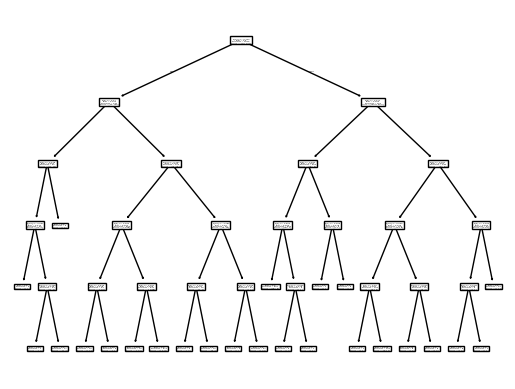

In [65]:
calculate(clf1,x_train_clf1,y_train_clf1,x_test,y_test)

# For Tree 2

## Applying With Replacement and random state=42 

In [66]:
x_train_clf2=df_train.iloc[:,:-1].sample(1500,random_state=22,replace=True)
y_train_clf2=df_train['label'].sample(1500,random_state=22,replace=True)

In [67]:
x_train_clf2

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3142,0.104793,0.085201,0.077886,0.028388,0.186101,0.157712,2.419127,11.281968,0.956977,0.718462,0.008492,0.104793,0.183565,0.016444,0.275862,0.297953,0.007812,0.859375,0.851562,0.370904
2328,0.234023,0.035242,0.242041,0.214286,0.257551,0.043265,2.019871,6.921375,0.838263,0.171757,0.253061,0.234023,0.168160,0.047013,0.277457,1.449375,0.023438,10.289062,10.265625,0.110780
1925,0.151283,0.110261,0.208732,0.000267,0.245567,0.245300,25.152536,680.485837,0.768258,0.288361,0.000000,0.151283,0.182116,0.015984,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
1254,0.186968,0.054704,0.180149,0.141456,0.238811,0.097355,0.654209,2.462561,0.923932,0.350318,0.249629,0.186968,0.124294,0.046921,0.266667,1.368351,0.023438,4.523438,4.500000,0.174670
359,0.165156,0.071653,0.157821,0.116289,0.231370,0.115081,1.252581,4.576221,0.965833,0.738276,0.133506,0.165156,0.120491,0.017917,0.253968,0.310677,0.007812,0.679688,0.671875,0.385797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,0.193121,0.043549,0.195873,0.170804,0.221366,0.050561,1.515203,4.494621,0.885225,0.334324,0.219241,0.193121,0.152385,0.047291,0.277457,2.131856,0.023438,12.117188,12.093750,0.128286
274,0.143060,0.071637,0.164345,0.092177,0.195293,0.103116,2.287804,9.175746,0.935944,0.583080,0.096713,0.143060,0.098502,0.016842,0.262295,0.479725,0.007812,4.851562,4.843750,0.160529
274,0.143060,0.071637,0.164345,0.092177,0.195293,0.103116,2.287804,9.175746,0.935944,0.583080,0.096713,0.143060,0.098502,0.016842,0.262295,0.479725,0.007812,4.851562,4.843750,0.160529
2123,0.190361,0.034509,0.189032,0.172258,0.214839,0.042581,2.279864,8.343807,0.846785,0.232021,0.168710,0.190361,0.161404,0.019002,0.246154,0.765625,0.078125,6.781250,6.703125,0.050339


In [68]:
y_train_clf2

3142    0
2328    0
1925    0
1254    1
359     1
       ..
2223    0
274     1
274     1
2123    0
1959    0
Name: label, Length: 1500, dtype: int64

Accuracy Score=	 0.9580479452054794


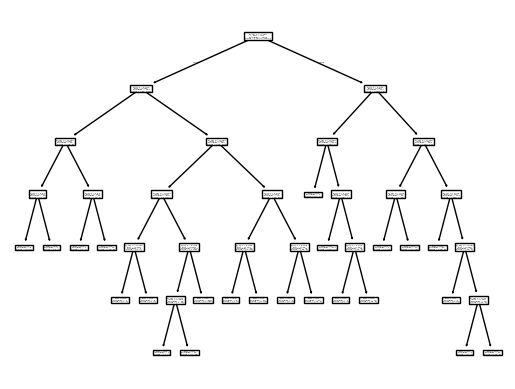

In [69]:
calculate(clf2,x_train_clf2,y_train_clf2,x_test,y_test)

# For Tree 3 

## Without Replacement 

In [70]:
x_train_clf3=df_train.iloc[:,:-1].sample(1500,random_state=42)
y_train_clf3=df_train['label'].sample(1500,random_state=42)

In [71]:
x_train_clf3

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3030,0.210498,0.047339,0.218029,0.205764,0.232715,0.026951,4.030985,24.994033,0.855689,0.286190,0.217545,0.210498,0.209672,0.099010,0.270270,0.433304,0.209961,0.888672,0.678711,0.468564
703,0.149878,0.061349,0.158791,0.095605,0.197198,0.101593,2.535442,10.295662,0.909933,0.447821,0.095398,0.149878,0.099987,0.053763,0.270270,0.404000,0.087891,0.786133,0.698242,0.654164
1909,0.183201,0.065166,0.191227,0.158628,0.235031,0.076403,2.717304,21.113053,0.926864,0.501417,0.000000,0.183201,0.157970,0.015842,0.275862,0.184896,0.007812,2.437500,2.429688,0.049592
1491,0.149386,0.076309,0.161971,0.096910,0.214939,0.118029,2.199733,8.002790,0.936652,0.607214,0.213747,0.149386,0.118986,0.016546,0.275862,0.440104,0.007812,2.289062,2.281250,0.117875
2842,0.218758,0.037823,0.221782,0.215842,0.233663,0.017822,4.954632,34.045589,0.794259,0.222866,0.218218,0.218758,0.206016,0.046921,0.279070,0.996626,0.023438,6.281250,6.257812,0.094027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.162411,0.059952,0.143590,0.119014,0.220079,0.101065,4.065658,23.763916,0.891543,0.363008,0.000000,0.162411,0.101050,0.015702,0.262295,0.113281,0.007812,0.656250,0.648438,0.185631
2880,0.218563,0.037258,0.221329,0.197956,0.244702,0.046746,1.322707,3.390100,0.865930,0.231703,0.216082,0.218563,0.151086,0.047013,0.279070,1.117969,0.023438,5.601562,5.578125,0.162425
500,0.212620,0.049833,0.226059,0.163921,0.256365,0.092444,1.277224,4.127832,0.906783,0.180813,0.238448,0.212620,0.119024,0.020487,0.238806,0.671875,0.007812,5.906250,5.898438,0.124798
937,0.201306,0.061697,0.232042,0.132249,0.257232,0.124983,2.110824,7.107624,0.874539,0.294794,0.258685,0.201306,0.113616,0.046921,0.269663,0.962573,0.140625,5.929688,5.789062,0.093623


In [72]:
y_train_clf3

3030    0
703     1
1909    0
1491    1
2842    0
       ..
635     1
2880    0
500     1
937     1
2797    0
Name: label, Length: 1500, dtype: int64

Accuracy Score=	 0.9563356164383562


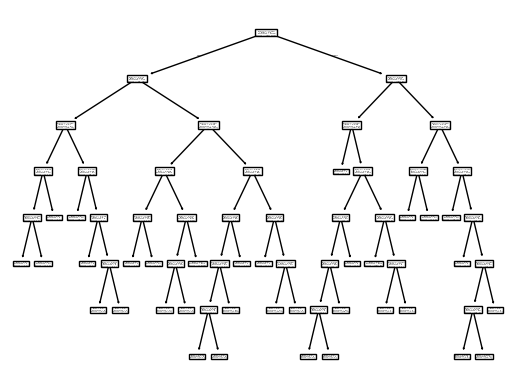

In [73]:
calculate(clf3,x_train_clf3,y_train_clf3,x_test,y_test)

# For Tree 4 

## Applying Column Sampling 

In [74]:
x_train_clf4=df_train.iloc[:,:-1].sample(2000,random_state=52).sample(10,random_state=52,axis=1)
y_train_clf4=df_train['label'].sample(2000,random_state=52)

In [75]:
x_train_clf4

,skew,median,Q75,sp.ent,maxdom,kurt,mindom,sfm,meanfun,sd
113,2.038745,0.142837,0.239285,0.921624,5.593750,7.546507,0.007812,0.482640,0.111090,0.068168
2843,3.203322,0.234402,0.252570,0.815910,6.093750,15.142444,0.210938,0.200592,0.189905,0.041730
507,2.907550,0.149529,0.239979,0.940861,4.882812,19.862833,0.007812,0.610161,0.141772,0.077851
1677,1.703658,0.186555,0.213254,0.941309,3.523438,6.708772,0.023438,0.625273,0.178228,0.083294
1402,0.962328,0.198841,0.255652,0.904721,8.203125,3.041600,0.023438,0.295208,0.123511,0.057029
...,...,...,...,...,...,...,...,...,...,...
1628,2.506122,0.215941,0.236863,0.921195,4.101562,10.818675,0.007812,0.531715,0.156697,0.082691
2971,3.624944,0.163169,0.189112,0.902582,3.579102,21.137369,0.146484,0.450486,0.144369,0.050922
1519,4.051959,0.126502,0.228520,0.939789,0.257812,33.206868,0.007812,0.653992,0.092487,0.082545
2416,2.863813,0.216552,0.226897,0.804507,9.046875,11.917984,0.023438,0.187841,0.170406,0.030726


In [76]:
y_train_clf4

113     1
2843    0
507     1
1677    0
1402    1
       ..
1628    0
2971    0
1519    1
2416    0
2347    0
Name: label, Length: 2000, dtype: int64

Accuracy Score=	 0.952054794520548


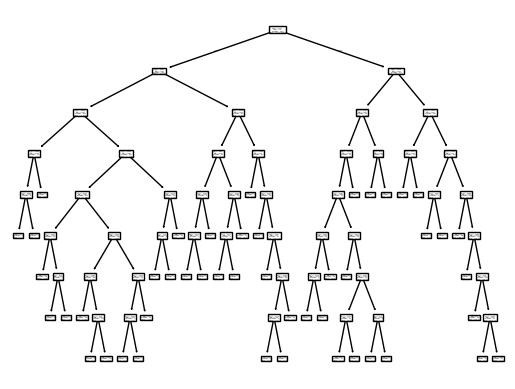

In [77]:
calculate(clf4,x_train_clf4,y_train_clf4,x_test.sample(10,random_state=52,axis=1),y_test)

# For Tree 5 

## Applying Column Sampling 

In [78]:
x_train_clf5=df_train.iloc[:,:-1].sample(2000,random_state=92).sample(15,random_state=92,axis=1)
y_train_clf5=df_train['label'].sample(2000,random_state=92)

In [79]:
x_train_clf5

,IQR,maxfun,sp.ent,median,mindom,dfrange,meanfreq,sfm,Q75,sd,maxdom,minfun,kurt,modindx,meanfun
1316,0.109919,0.279070,0.922026,0.200388,0.023438,8.953125,0.180379,0.495646,0.228433,0.061037,8.976562,0.047525,4.077801,0.099553,0.134859
1181,0.123312,0.275862,0.880572,0.209385,0.023438,7.687500,0.201039,0.333158,0.262434,0.063253,7.710938,0.047525,7.790039,0.100537,0.139780
2357,0.062056,0.279070,0.860796,0.239626,0.023438,6.468750,0.229656,0.227796,0.263551,0.041493,6.492188,0.057762,9.943458,0.125039,0.177047
1899,0.061840,0.275862,0.914982,0.221595,0.054688,0.710938,0.193962,0.513838,0.249080,0.078522,0.765625,0.016580,7.786476,0.178783,0.180687
1423,0.083575,0.279070,0.920331,0.183676,0.023438,4.171875,0.182851,0.434536,0.234199,0.061268,4.195312,0.046967,4.829839,0.128349,0.133268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032,0.033520,0.235294,0.879603,0.186111,0.007812,6.437500,0.190443,0.346129,0.208624,0.045738,6.445312,0.018868,16.399492,0.224009,0.141099
1352,0.100679,0.279070,0.909433,0.187963,0.023438,6.750000,0.192726,0.313134,0.243704,0.054815,6.773438,0.048048,3.820473,0.130833,0.133601
889,0.125543,0.279070,0.913041,0.203152,0.023438,9.445312,0.194248,0.472265,0.259837,0.066108,9.468750,0.046921,11.588198,0.115354,0.146746
225,0.106244,0.231884,0.920326,0.198207,0.007812,2.757812,0.174806,0.480294,0.223308,0.061149,2.765625,0.015779,11.762188,0.204582,0.105128


In [80]:
y_train_clf5

1316    1
1181    1
2357    0
1899    0
1423    1
       ..
2032    0
1352    1
889     1
225     1
2353    0
Name: label, Length: 2000, dtype: int64

Accuracy Score=	 0.9580479452054794


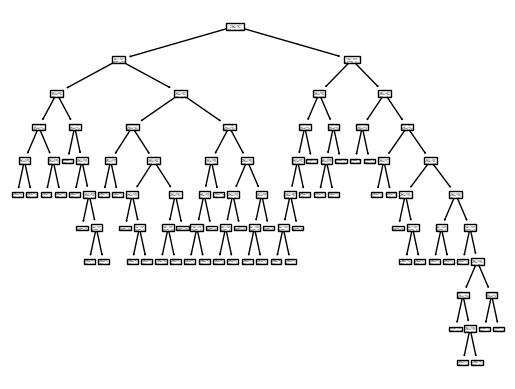

In [81]:
calculate(clf5,x_train_clf5,y_train_clf5,x_test.sample(15,random_state=92,axis=1),y_test)

# For  Tree 6 

## Applying COlumn SAmpling 

In [82]:
x_train_clf6=df_train.iloc[:,:-1].sample(2000,random_state=82).sample(17,random_state=2,axis=1)
y_train_clf6=df_train['label'].sample(2000,random_state=82)

In [83]:
x_train_clf6

,meanfun,Q75,dfrange,meanfreq,sfm,IQR,Q25,mode,sd,maxdom,kurt,mindom,maxfun,median,centroid,skew,modindx
1260,0.121880,0.236859,9.328125,0.182282,0.431142,0.114904,0.121956,0.113244,0.063030,9.351562,5.006035,0.023438,0.277457,0.199111,0.182282,1.487955,0.098469
427,0.107315,0.240261,4.437500,0.193812,0.391551,0.106884,0.133377,0.229299,0.059079,4.648438,6.634973,0.210938,0.139130,0.212398,0.193812,1.668265,0.223812
2766,0.144965,0.204715,11.484375,0.185579,0.305361,0.038570,0.166146,0.177272,0.040186,11.507812,12.095910,0.023438,0.277457,0.177272,0.185579,2.915659,0.142897
13,0.131504,0.229532,2.796875,0.181225,0.537080,0.100693,0.128839,0.219827,0.060042,2.804688,5.475600,0.007812,0.275862,0.190953,0.181225,1.369430,0.416550
1438,0.125539,0.230159,5.812500,0.179278,0.495579,0.091577,0.138582,0.178292,0.061123,5.835938,5.812746,0.023438,0.279070,0.179913,0.179278,1.528312,0.184044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2406,0.175334,0.247862,4.218750,0.227865,0.200613,0.034340,0.213522,0.236855,0.035049,4.242188,7.642660,0.023438,0.274286,0.233333,0.227865,2.168606,0.065116
1081,0.126774,0.225498,3.820312,0.180851,0.379893,0.104844,0.120654,0.223834,0.056155,3.843750,4.956173,0.023438,0.279070,0.199287,0.180851,1.523039,0.131184
500,0.119024,0.256365,5.898438,0.212620,0.180813,0.092444,0.163921,0.238448,0.049833,5.906250,4.127832,0.007812,0.238806,0.226059,0.212620,1.277224,0.124798
2369,0.172775,0.240374,9.773438,0.223610,0.186741,0.028411,0.211963,0.224299,0.033286,9.796875,10.884271,0.023438,0.279070,0.226916,0.223610,2.620117,0.077382


In [84]:
y_train_clf6

1260    1
427     1
2766    0
13      1
1438    1
       ..
2406    0
1081    1
500     1
2369    0
505     1
Name: label, Length: 2000, dtype: int64

Accuracy Score=	 0.964041095890411


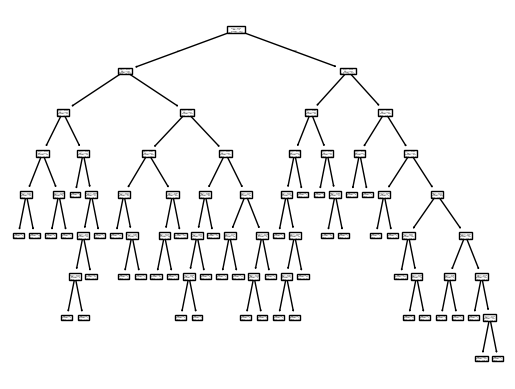

In [85]:
calculate(clf6,x_train_clf6,y_train_clf6,x_test.sample(17,random_state=2,axis=1),y_test)

# FOr Tree 7 

In [86]:
x_train_clf7=df_train.iloc[:,:-1]
y_train_clf7=df_train['label']

In [87]:
x_train_clf7

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1736,0.143916,0.086153,0.154149,0.057340,0.214468,0.157128,1.135276,4.445334,0.972161,0.787590,0.212420,0.143916,0.148854,0.015889,0.275862,0.485085,0.007812,6.031250,6.023438,0.130180
688,0.153817,0.058905,0.162708,0.102083,0.202292,0.100208,3.651088,19.951360,0.896026,0.445363,0.099583,0.153817,0.105999,0.089286,0.263158,0.520601,0.092773,0.800781,0.708008,0.670115
719,0.159023,0.065191,0.175968,0.094592,0.196359,0.101767,3.229614,15.630528,0.896248,0.406344,0.092704,0.159023,0.093707,0.020877,0.185185,0.414632,0.004883,0.776367,0.771484,0.582566
252,0.126626,0.088278,0.128532,0.049552,0.204482,0.154930,28.274954,853.298248,0.847263,0.535170,0.000000,0.126626,0.089230,0.016293,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000
937,0.201306,0.061697,0.232042,0.132249,0.257232,0.124983,2.110824,7.107624,0.874539,0.294794,0.258685,0.201306,0.113616,0.046921,0.269663,0.962573,0.140625,5.929688,5.789062,0.093623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.199321,0.052499,0.184211,0.152323,0.258149,0.105826,2.311426,8.848103,0.882884,0.089740,0.275299,0.199321,0.134527,0.015764,0.205128,1.173437,0.007812,5.343750,5.335938,0.156099
1049,0.192763,0.059136,0.216300,0.126000,0.240800,0.114800,2.616276,11.289920,0.900464,0.392967,0.240450,0.192763,0.110624,0.047856,0.275862,1.017379,0.023438,9.187500,9.164062,0.096896
1730,0.161227,0.078611,0.191471,0.090817,0.223725,0.132908,1.976542,7.122326,0.952126,0.700683,0.230588,0.161227,0.198810,0.095238,0.242424,0.872768,0.007812,3.281250,3.273438,0.282908
1703,0.192677,0.070494,0.215170,0.176886,0.241437,0.064551,2.166917,11.948492,0.917667,0.493545,0.050020,0.192677,0.158243,0.017429,0.266667,0.188657,0.039062,0.531250,0.492188,0.252747


In [88]:
y_train_clf7

1736    0
688     1
719     1
252     1
937     1
       ..
299     1
1049    1
1730    0
1703    0
500     1
Name: label, Length: 2000, dtype: int64

Accuracy Score=	 0.9674657534246576


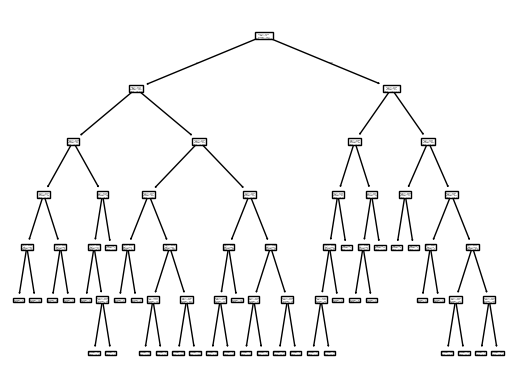

In [89]:
calculate(clf7,x_train_clf7,y_train_clf7,x_test,y_test)

# For Tree 8 

In [90]:
x_train_clf8=df_train.iloc[:,:-1]
y_train_clf8=df_train['label']

Accuracy Score=	 0.9691780821917808


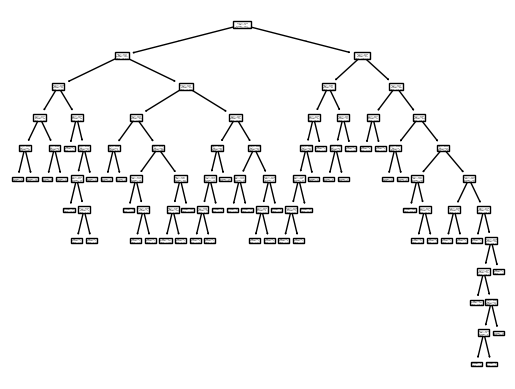

In [91]:
calculate(clf8,x_train_clf8,y_train_clf8,x_test,y_test)

In [92]:
rs_vc=VotingClassifier(estimators=[
        ('clf1',clf1),
        ('clf2',clf2), 
        ('clf3',clf3), 
        ('clf4',clf4),
        ('clf5',clf5),
        ('clf6',clf6),
        ('clf7',clf7),
        ('clf8',clf8)
],voting='soft',n_jobs=-1,verbose=True)

# Testing 

In [93]:
df_test_test=df_test.reset_index()
df_test_test=df_test_test.drop(columns=['index'])
df_test_test

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.192300,0.062510,0.217990,0.130221,0.247087,0.116865,2.000917,7.600014,0.899887,0.400099,0.245656,0.192300,0.134046,0.050104,0.279070,0.514453,0.023438,2.578125,2.554688,0.073649,1
1,0.182051,0.056408,0.193285,0.175051,0.212735,0.037685,2.659047,11.830639,0.875828,0.410387,0.050246,0.182051,0.143441,0.015733,0.219178,0.196546,0.054688,0.695312,0.640625,0.146341,0
2,0.130411,0.093199,0.135240,0.025100,0.217032,0.191932,27.798182,834.800916,0.812734,0.403256,0.000000,0.130411,0.107765,0.018713,0.170213,0.007812,0.007812,0.007812,0.000000,0.000000,1
3,0.199759,0.062122,0.186118,0.141318,0.261882,0.120565,2.081279,6.722083,0.853268,0.214173,0.143953,0.199759,0.130808,0.051282,0.279070,1.160156,0.023438,8.179688,8.156250,0.085002,1
4,0.150052,0.057224,0.149065,0.098034,0.196067,0.098034,4.696294,30.069113,0.856594,0.358091,0.097810,0.150052,0.096564,0.020619,0.212766,0.305060,0.097656,0.761719,0.664062,0.370956,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,0.209199,0.041990,0.209870,0.191169,0.234286,0.043117,2.046064,6.907791,0.862945,0.303689,0.205195,0.209199,0.162562,0.049332,0.277457,1.301398,0.023438,6.843750,6.820312,0.138439,0
1164,0.124695,0.080989,0.131882,0.042033,0.197268,0.155234,1.970756,8.000504,0.958531,0.721682,0.197712,0.124695,0.182513,0.068966,0.238806,0.293527,0.007812,0.851562,0.843750,0.396091,0
1165,0.181421,0.055640,0.170887,0.145485,0.226309,0.080825,1.211773,4.257557,0.928712,0.427925,0.160495,0.181421,0.130937,0.047105,0.277457,1.071340,0.023438,6.445312,6.421875,0.138094,1
1166,0.192817,0.035026,0.191238,0.172787,0.219163,0.046376,2.052242,7.308963,0.866241,0.236268,0.173037,0.192817,0.169441,0.024653,0.231884,0.550521,0.156250,4.796875,4.640625,0.125740,0


In [94]:
df_test_test.sample(1)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
848,0.205177,0.046889,0.212767,0.204628,0.227744,0.023116,3.695067,18.90391,0.849017,0.291601,0.210326,0.205177,0.201443,0.063694,0.25,0.405273,0.004883,0.830078,0.825195,0.447616,0


In [95]:
x_test_clf4 = x_test[x_train_clf4.columns]
x_test_clf5 = x_test[x_train_clf5.columns]
x_test_clf6 = x_test[x_train_clf6.columns]



test_input_row = x_test.iloc[[1145]]
test_input_clf4 = test_input_row[x_train_clf4.columns]
test_input_clf5 = test_input_row[x_train_clf5.columns]
test_input_clf6 = test_input_row[x_train_clf6.columns]

# Fit and predict
rs_vc.fit(x_train_clf7, y_train_clf7)
single_preds = {
    'clf1': clf1.predict(test_input_row)[0],
    'clf2': clf2.predict(test_input_row)[0],
    'clf3': clf3.predict(test_input_row)[0],
    'clf4': clf4.predict(test_input_clf4)[0],
    'clf5': clf5.predict(test_input_clf5)[0],
    'clf6': clf6.predict(test_input_clf6)[0],
    'clf7': clf7.predict(test_input_row)[0],
    'clf8': clf8.predict(test_input_row)[0],
    'rs_vc': rs_vc.predict(test_input_row)[0]
}

single_preds

{'clf1': np.int64(0),
 'clf2': np.int64(1),
 'clf3': np.int64(0),
 'clf4': np.int64(0),
 'clf5': np.int64(0),
 'clf6': np.int64(0),
 'clf7': np.int64(0),
 'clf8': np.int64(0),
 'rs_vc': np.int64(0)}

In [96]:
df_test_test.sample(2)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1163,0.209199,0.041990,0.209870,0.191169,0.234286,0.043117,2.046064,6.907791,0.862945,0.303689,0.205195,0.209199,0.162562,0.049332,0.277457,1.301398,0.023438,6.843750,6.820312,0.138439,0
920,0.176208,0.062208,0.169821,0.143251,0.227976,0.084725,2.013612,8.081428,0.940780,0.580159,0.158301,0.176208,0.144872,0.018553,0.256410,1.201404,0.234375,3.525391,3.291016,0.264491,0


In [97]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt', 'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun', 'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'], dtype='object')

In [98]:
# # Input collection
# user_input = {}
# cols = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
#         'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
#         'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

# print("Enter the following 20 features:")

# for col in cols:
#     val = float(input(f"{col}: "))
#     user_input[col] = val

# # Convert to DataFrame
# user_df = pd.DataFrame([user_input])

# # Prepare sub-inputs for models with column sampling
# test_input_clf4 = user_df[x_train_clf4.columns]
# test_input_clf5 = user_df[x_train_clf5.columns]
# test_input_clf6 = user_df[x_train_clf6.columns]

# # Fit the voting classifier (if not already done)
# rs_vc.fit(x_train_clf7, y_train_clf7)

# # Make predictions from all classifiers
# single_preds = {
#     'clf1': clf1.predict(user_df)[0],
#     'clf2': clf2.predict(user_df)[0],
#     'clf3': clf3.predict(user_df)[0],
#     'clf4': clf4.predict(test_input_clf4)[0],
#     'clf5': clf5.predict(test_input_clf5)[0],
#     'clf6': clf6.predict(test_input_clf6)[0],
#     'clf7': clf7.predict(user_df)[0],
#     'clf8': clf8.predict(user_df)[0],
#     'rs_vc': rs_vc.predict(user_df)[0]
# }

# # Display model predictions
# for model, pred in single_preds.items():
#     print(f"{model} prediction: {'male' if pred == 1 else 'female'}")

# # Final decision based on majority voting (including all models)
# final_vote = sum(single_preds.values())  # Sum of 1s
# if final_vote >= 5:  # Majority says male
#     print("\n🔍 Final Prediction: Male")
# else:
#     print("\n🔍 Final Prediction: Female")

In [101]:
models = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]
column_sets = [
    None, 
    None, 
    None,
    x_train_clf4.columns.tolist(),
    x_train_clf5.columns.tolist(),
    x_train_clf6.columns.tolist(),
    None,
    None
]
full_columns = df_train.iloc[:, :-1].columns.tolist()


custom_ensemble = CustomEnsemble(models, column_sets, full_columns)


test_sample = df_test_test.sample(7)
predictions = custom_ensemble.predict(test_sample)
print(predictions)

[1 0 1 0 1 0 0]


In [102]:
from sklearn.metrics import accuracy_score


x_test_features = df_test_tes


ensemble_predictions = custom_ensemble.predict(x_test_features)


y_true = df_test_test['label']


accuracy = accuracy_score(y_true, ensemble_predictions)
print(f"Ensemble Model Accuracy: {accuracy:.4f}")


for i, model in enumerate(models):
    if column_sets[i] is not None:
        
        x_sub = x_test_features[column_sets[i]]
        pred = model.predict(x_sub)
    else:
        
        pred = model.predict(x_test_features)
    
    acc = accuracy_score(y_true, pred)
    print(f"Model {i+1} Accuracy: {acc:.4f}")

Ensemble Model Accuracy: 0.9726
Model 1 Accuracy: 0.9538
Model 2 Accuracy: 0.9580
Model 3 Accuracy: 0.9563
Model 4 Accuracy: 0.9521
Model 5 Accuracy: 0.9580
Model 6 Accuracy: 0.9640
Model 7 Accuracy: 0.9675
Model 8 Accuracy: 0.9692


In [103]:
# Save artifacts
with open('voice_gender_model.pkl', 'wb') as f:
    pickle.dump(custom_ensemble, f)
    
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# Save metadata
metadata = {
    'full_columns': full_columns,
    'column_sets': column_sets
}

with open('model_metadata.pkl', 'wb') as f:
    pickle.dump(metadata, f)

In [104]:

custom_ensemble.predict(df_test_test.sample(7))

array([1, 1, 1, 1, 0, 0, 1])